# UoG-DA_Group28 Jupyter Notebook: Classification - Neural Network (MLP)

<hr>

## <u> Initial Setup </u>

In [20]:
from utils import *

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the Datasets
dataset_1 = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")
dataset_2 = load_from_pickle("cir_ncir_pca.pkl", "./pickled_data_sets")

## <u> Training and Analysis </u>

### <b> Dataset: cir_ncir_agg </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [21]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

In [22]:
training_accuracy = []
testing_accuracy = []

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the Multi-Layer Perceptron (MLP) model based on several `hidden_layer_sizes` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `solver` : `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
- `learning_rate` : `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5
- `max_iter` : 1000 

Hidden Layer Size:  [2]
Training Accuracy:  0.8575510204081632
Testing Accuracy:  0.8588888888888889
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.8580612244897959
Testing Accuracy:  0.859920634920635
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.8585714285714285
Testing Accuracy:  0.8582539682539683
Hidden Layer Size:  [5]
Training Accuracy:  0.8587755102040816
Testing Accuracy:  0.8600793650793651
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.9022108843537415
Testing Accuracy:  0.900952380952381
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8575850340136054
Testing Accuracy:  0.859920634920635
Hidden Layer Size:  [10]
Training Accuracy:  0.9078231292517007
Testing Accuracy:  0.9034126984126984
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.908469387755102
Testing Accuracy:  0.908015873015873
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.907312925170068
Testing Accuracy:  0.9076190476190477
Hidden Layer Size:  [20]
Training Accuracy:  0.9087074829931973


Text(0, 0.5, 'Accuracy')

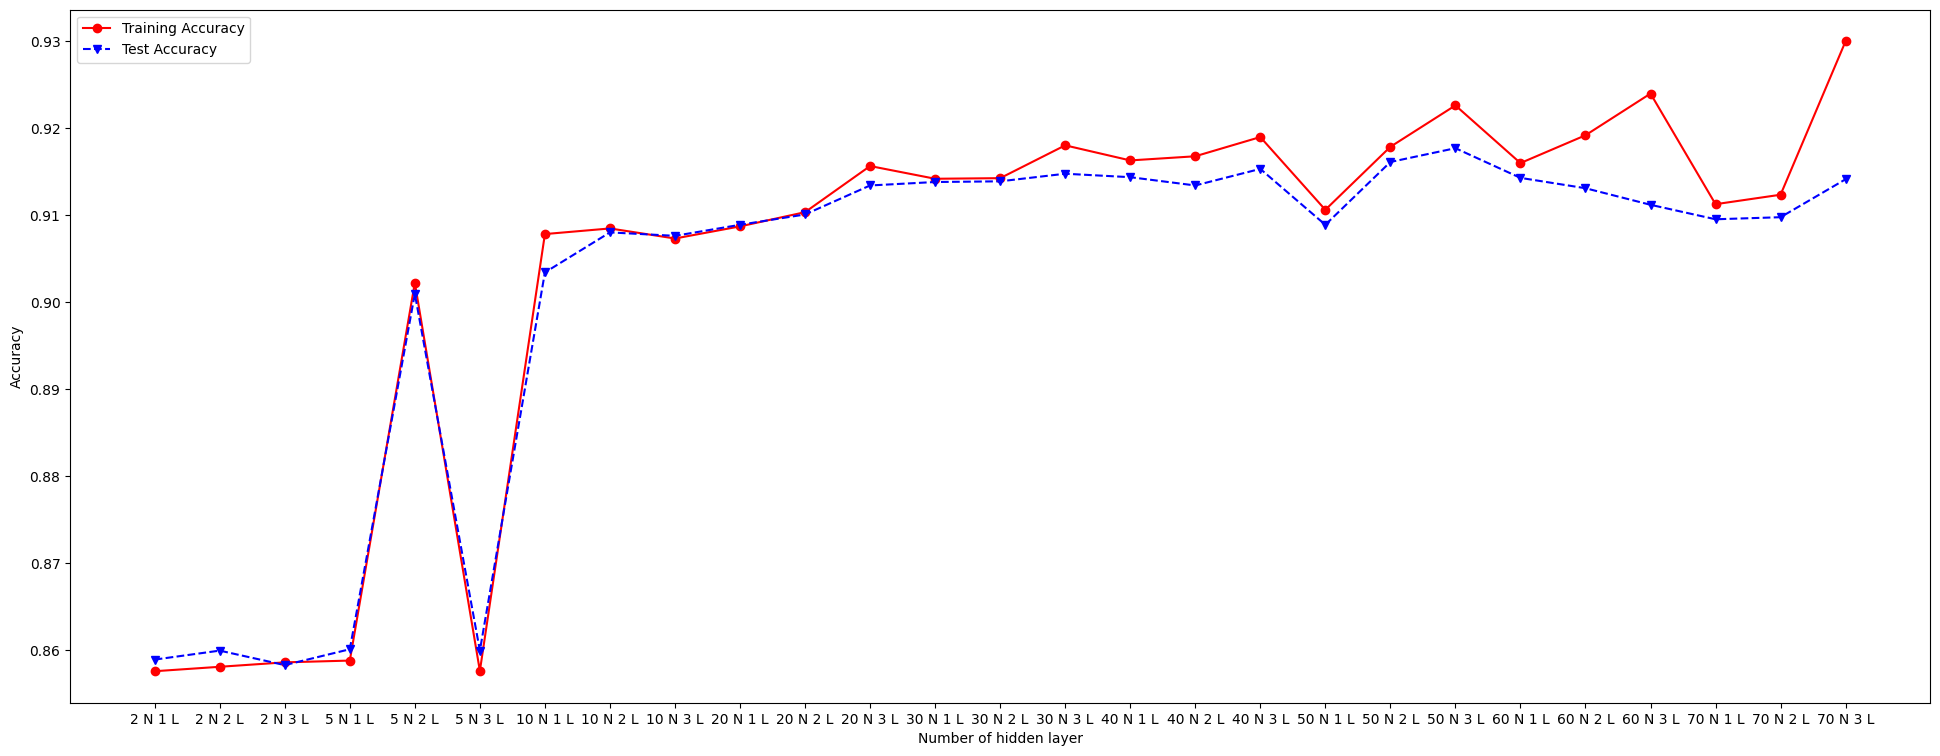

In [23]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

hidden_layer_titles = ["2 N 1 L", "2 N 2 L", "2 N 3 L", "5 N 1 L", "5 N 2 L", "5 N 3 L", "10 N 1 L", "10 N 2 L", "10 N 3 L", "20 N 1 L", "20 N 2 L", "20 N 3 L", "30 N 1 L", "30 N 2 L", "30 N 3 L", "40 N 1 L", "40 N 2 L", "40 N 3 L", "50 N 1 L", "50 N 2 L", "50 N 3 L", "60 N 1 L", "60 N 2 L", "60 N 3 L", "70 N 1 L", "70 N 2 L", "70 N 3 L"]
hidden_layer_sizes = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]
trainAcc = []
testAcc = []

highestAcc = 0
highestAccIndex = 0

for index, k in enumerate(hidden_layer_sizes):
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    if accuracy_score(Y_test_70_30, Y_predTest) > highestAcc:
        highestAcc = accuracy_score(Y_test_70_30, Y_predTest)
        highestAccIndex = index
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

print("-------------------------------")
print("Highest Test Acc.: ", highestAcc)
print("Highest Test Acc. Hidden Layer Size: ", hidden_layer_titles[highestAccIndex])

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

Hidden Layer Size:  [2]
Training Accuracy:  0.85875
Testing Accuracy:  0.8577380952380952
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.8586904761904762
Testing Accuracy:  0.8582142857142857
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.8588988095238095
Testing Accuracy:  0.8567857142857143
Hidden Layer Size:  [5]
Training Accuracy:  0.8596130952380953
Testing Accuracy:  0.8583333333333333
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.9022619047619047
Testing Accuracy:  0.9004761904761904
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8594642857142857
Testing Accuracy:  0.8589285714285714
Hidden Layer Size:  [10]
Training Accuracy:  0.9079166666666667
Testing Accuracy:  0.9021428571428571
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.9048511904761904
Testing Accuracy:  0.9052380952380953
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.9085714285714286
Testing Accuracy:  0.9039285714285714
Hidden Layer Size:  [20]
Training Accuracy:  0.9094642857142857
Testi

Text(0, 0.5, 'Accuracy')

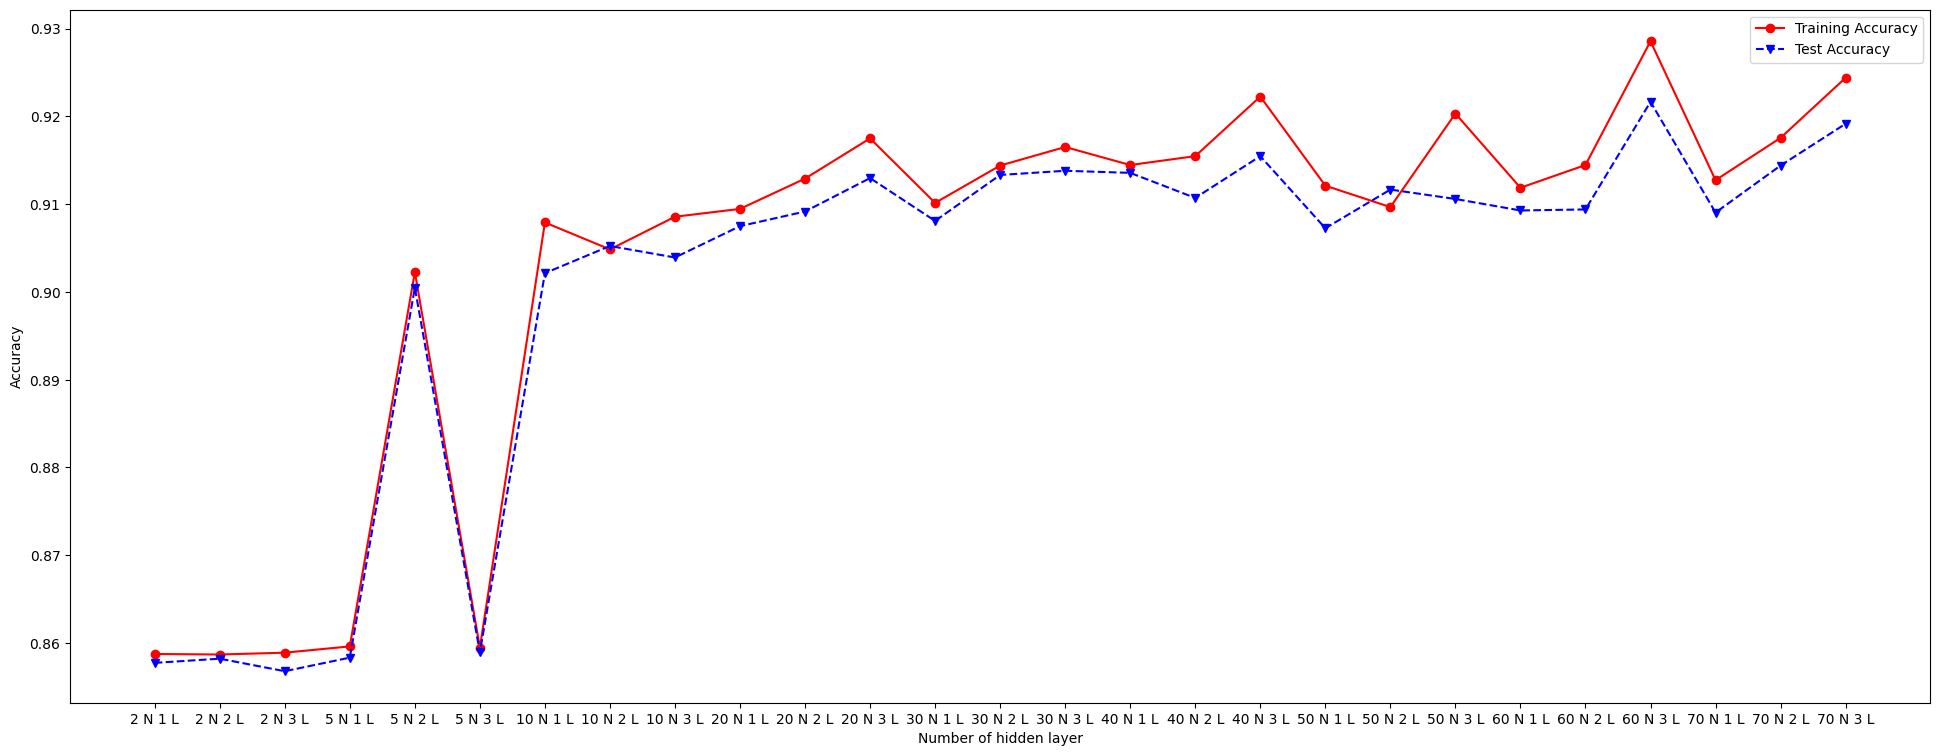

In [24]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

trainAcc = []
testAcc = []

highestAcc = 0
highestAccIndex = 0

for index, k in enumerate(hidden_layer_sizes):
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    if accuracy_score(Y_test_80_20, Y_predTest) > highestAcc:
        highestAcc = accuracy_score(Y_test_80_20, Y_predTest)
        highestAccIndex = index
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

print("-------------------------------")
print("Highest Test Acc.: ", highestAcc)
print("Highest Test Acc. Hidden Layer Size: ", hidden_layer_titles[highestAccIndex])

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe erratic progressions for both 'Training Accuracy' and 'Test Accuracy' with certain combinations Layer and Perception count combinations showing a higher 'Test Accuracy'.

The peak for the 'Test Accuracy' line has been identified at `hidden_layer_sizes = [50, 50, 50]` or 3 Layers of 50 Neurons and `hidden_layer_sizes = [60, 60, 60]` or 3 Layers of 60 Neurons, we will use as the optimal parameter for our models.
- `hidden_layer_sizes` : `[50, 50, 50]`, `[60, 60, 60]`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [25]:
HIDDEN_LAYER_SIZE = [50, 50, 50]

clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_70_30, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_70_30, Y_predTest))

Hidden Layer Size:  [50, 50, 50]
Training Accuracy:  0.9226190476190477
Testing Accuracy:  0.9176984126984127


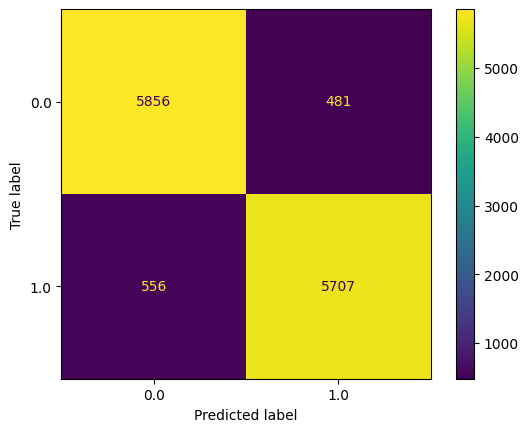

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      6337
         1.0       0.92      0.91      0.92      6263

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [26]:
HIDDEN_LAYER_SIZE = [60, 60, 60]

predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [27]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_80_20, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_80_20, Y_predTest))

Hidden Layer Size:  [60, 60, 60]
Training Accuracy:  0.9285714285714286
Testing Accuracy:  0.9216666666666666


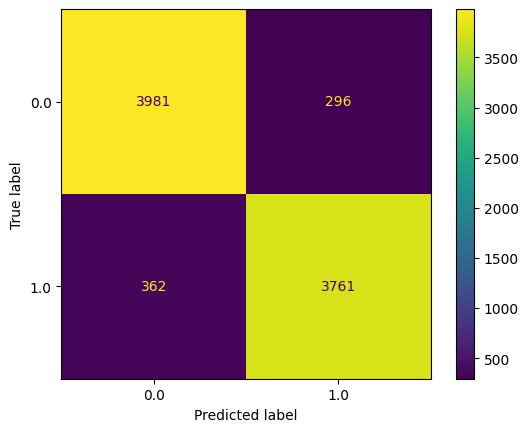

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      4277
         1.0       0.93      0.91      0.92      4123

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [28]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

### <b> Dataset: cir_ncir_pca </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [29]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the Multi-Layer Perceptron (MLP) model based on several `hidden_layer_sizes` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `solver` : `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
- `learning_rate` : `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5
- `max_iter` : 1000 

Hidden Layer Size:  [2]
Training Accuracy:  0.8590136054421769
Testing Accuracy:  0.8596031746031746
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.5012585034013606
Testing Accuracy:  0.49706349206349204
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.5012585034013606
Testing Accuracy:  0.49706349206349204
Hidden Layer Size:  [5]
Training Accuracy:  0.9052380952380953
Testing Accuracy:  0.9057142857142857
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.9006122448979592
Testing Accuracy:  0.9011904761904762
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.9096258503401361
Testing Accuracy:  0.9084126984126984
Hidden Layer Size:  [10]
Training Accuracy:  0.9091156462585034
Testing Accuracy:  0.9051587301587302
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.907891156462585
Testing Accuracy:  0.9052380952380953
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.9095238095238095
Testing Accuracy:  0.9082539682539682
Hidden Layer Size:  [20]
Training Accuracy:  0.9143197278

Text(0, 0.5, 'Accuracy')

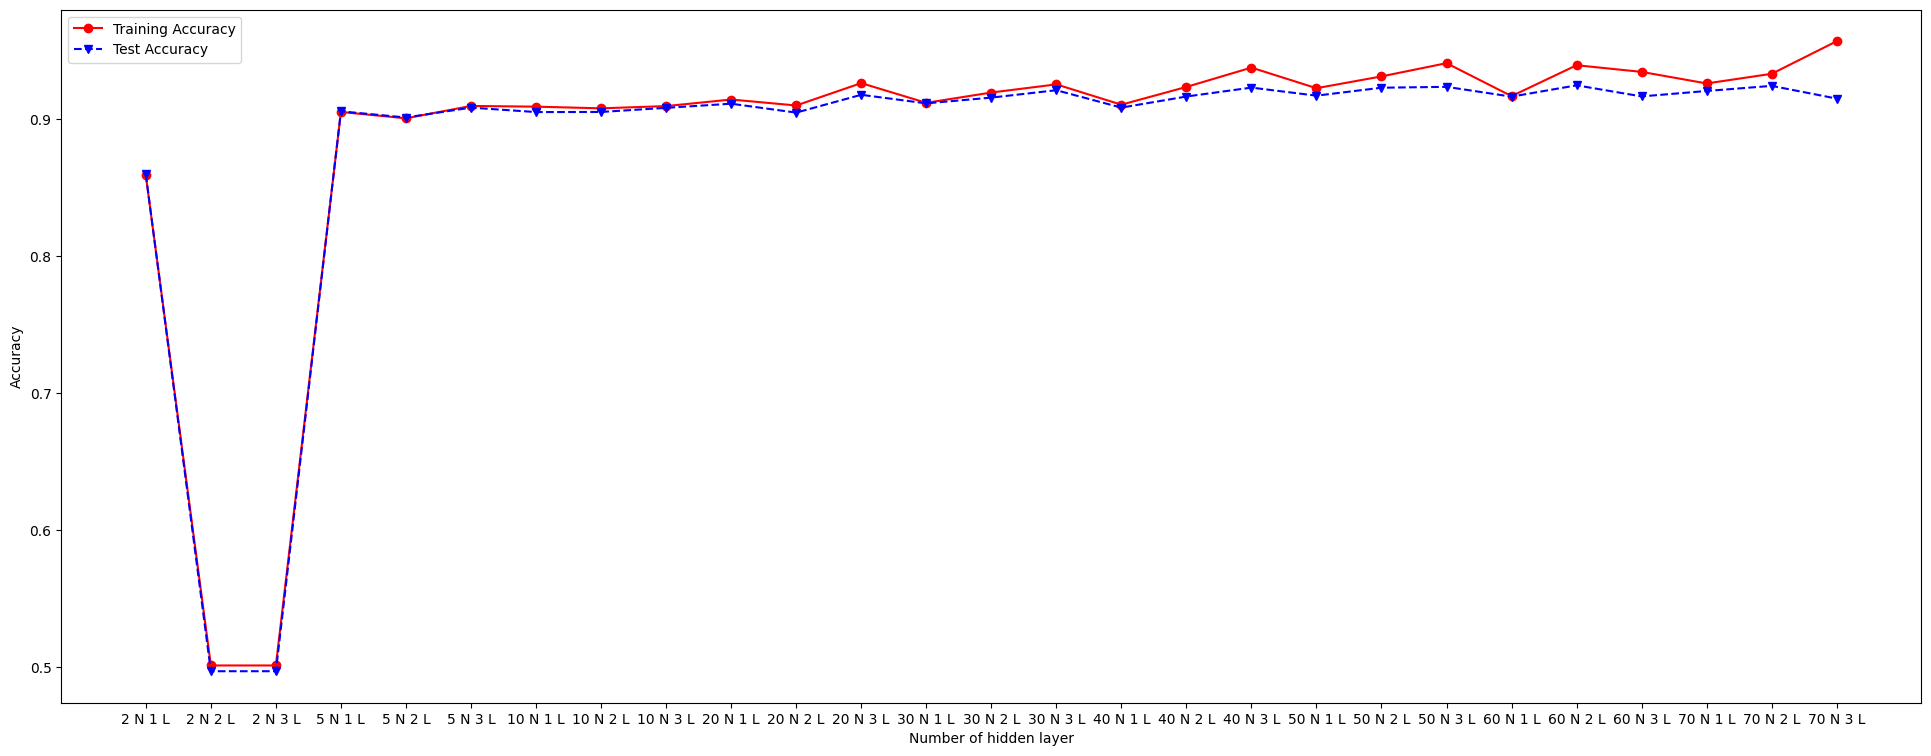

In [30]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

hidden_layer_titles = ["2 N 1 L", "2 N 2 L", "2 N 3 L", "5 N 1 L", "5 N 2 L", "5 N 3 L", "10 N 1 L", "10 N 2 L", "10 N 3 L", "20 N 1 L", "20 N 2 L", "20 N 3 L", "30 N 1 L", "30 N 2 L", "30 N 3 L", "40 N 1 L", "40 N 2 L", "40 N 3 L", "50 N 1 L", "50 N 2 L", "50 N 3 L", "60 N 1 L", "60 N 2 L", "60 N 3 L", "70 N 1 L", "70 N 2 L", "70 N 3 L"]
hidden_layer_sizes = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]
trainAcc = []
testAcc = []

highestAcc = 0
highestAccIndex = 0

for index, k in enumerate(hidden_layer_sizes):
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    if accuracy_score(Y_test_70_30, Y_predTest) > highestAcc:
        highestAcc = accuracy_score(Y_test_70_30, Y_predTest)
        highestAccIndex = index
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

print("-------------------------------")
print("Highest Test Acc.: ", highestAcc)
print("Highest Test Acc. Hidden Layer Size: ", hidden_layer_titles[highestAccIndex])

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

Hidden Layer Size:  [2]
Training Accuracy:  0.8596428571428572
Testing Accuracy:  0.8576190476190476
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.8583630952380953
Testing Accuracy:  0.8559523809523809
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.5022916666666667
Testing Accuracy:  0.49083333333333334
Hidden Layer Size:  [5]
Training Accuracy:  0.9055654761904762
Testing Accuracy:  0.900952380952381
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.9132440476190476
Testing Accuracy:  0.9078571428571428
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.900327380952381
Testing Accuracy:  0.898452380952381
Hidden Layer Size:  [10]
Training Accuracy:  0.90875
Testing Accuracy:  0.9025
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.9096428571428572
Testing Accuracy:  0.9047619047619048
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.9181547619047619
Testing Accuracy:  0.9167857142857143
Hidden Layer Size:  [20]
Training Accuracy:  0.9122023809523809
Testing Accuracy:  

Text(0, 0.5, 'Accuracy')

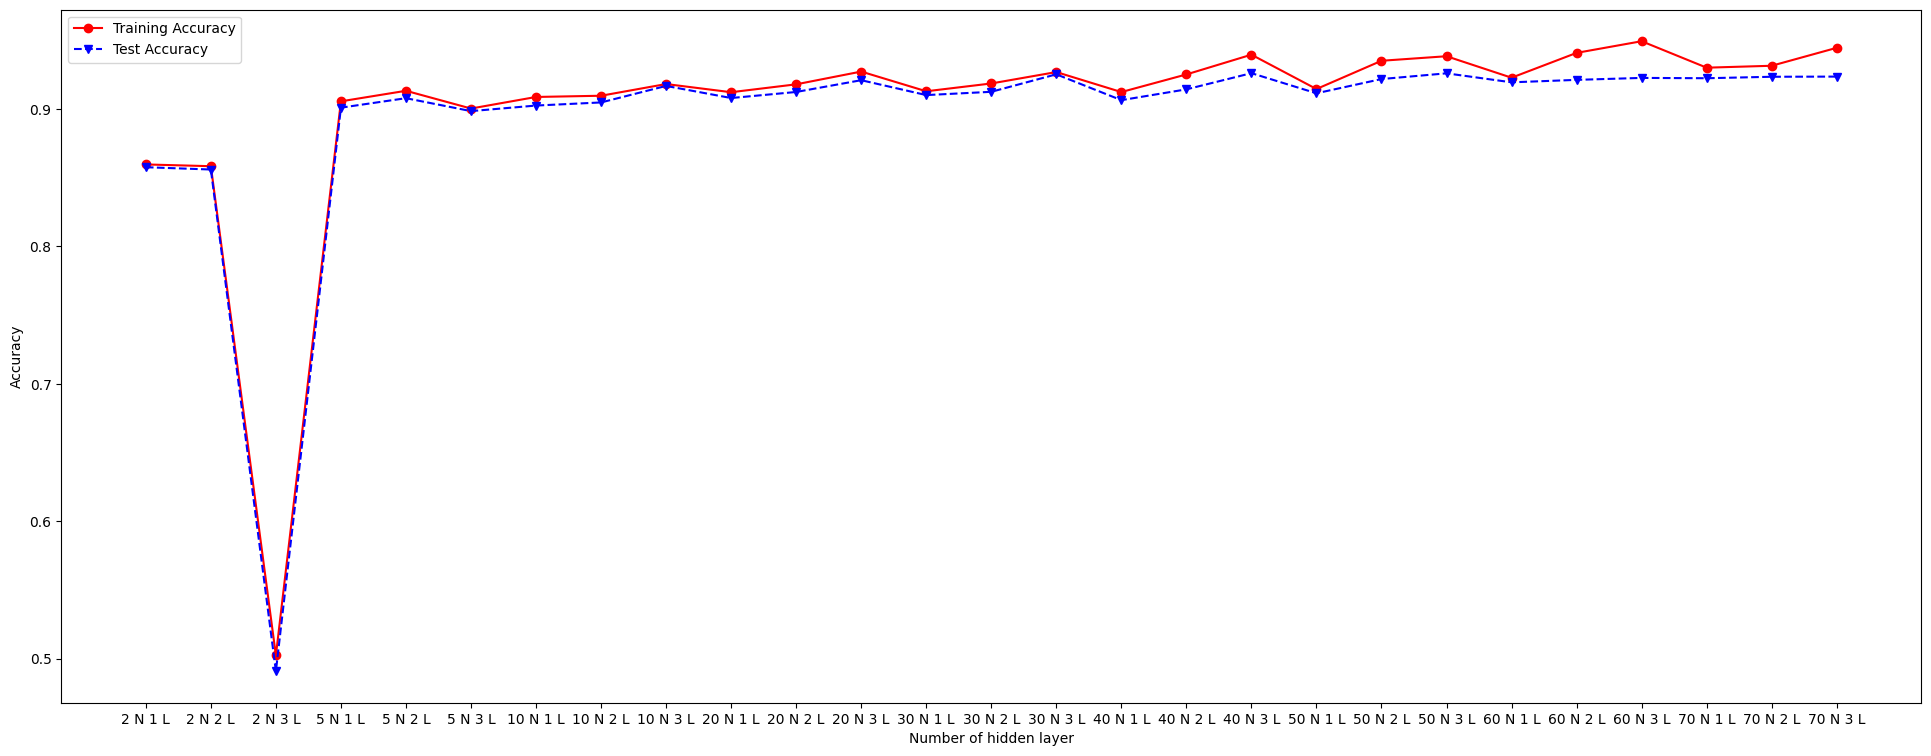

In [31]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

trainAcc = []
testAcc = []

highestAcc = 0
highestAccIndex = 0

for index, k in enumerate(hidden_layer_sizes):
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    if accuracy_score(Y_test_80_20, Y_predTest) > highestAcc:
        highestAcc = accuracy_score(Y_test_80_20, Y_predTest)
        highestAccIndex = index
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

print("-------------------------------")
print("Highest Test Acc.: ", highestAcc)
print("Highest Test Acc. Hidden Layer Size: ", hidden_layer_titles[highestAccIndex])

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe erratic progressions for both 'Training Accuracy' and 'Test Accuracy' with certain combinations Layer and Perception count combinations showing a higher 'Test Accuracy'.

The peak for the 'Test Accuracy' line has been identified at `hidden_layer_sizes = [60, 60]` or 2 Layers of 60 Neurons and `hidden_layer_sizes = [40, 40, 40]` or 3 Layers of 40 Neurons respectively for 70:30 and 80:20 splits 

Considering the reduced complexity and similar performance, we will use 3 Layers of 30 Neurons for this max-depth as the optimal parameter for our models for both 70:30 and 80:20 splits for consistency

We will this use this max-depth as the optimal parameter for our Decision Tree models for both 70:30 and 80:20 splits for consistency
- `hidden_layer_sizes` : `[30, 30, 30]`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [32]:
HIDDEN_LAYER_SIZE = [30, 30, 30]

clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_70_30, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_70_30, Y_predTest))

Hidden Layer Size:  [30, 30, 30]
Training Accuracy:  0.925374149659864
Testing Accuracy:  0.9211111111111111


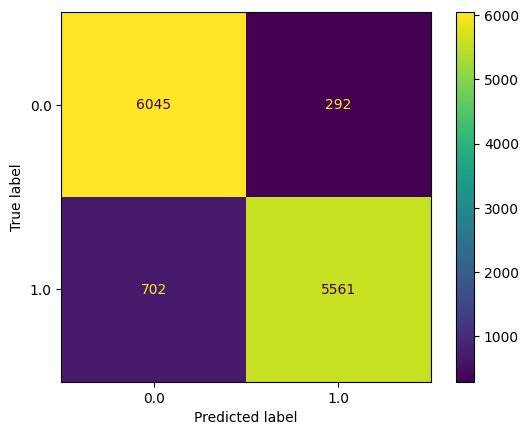

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      6337
         1.0       0.95      0.89      0.92      6263

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [33]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [34]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

training_accuracy.append(accuracy_score(Y_train_80_20, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_80_20, Y_predTest))

Hidden Layer Size:  [30, 30, 30]
Training Accuracy:  0.926875
Testing Accuracy:  0.9252380952380952


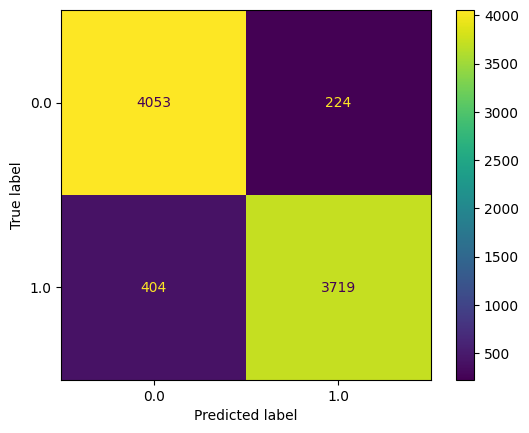

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      4277
         1.0       0.94      0.90      0.92      4123

    accuracy                           0.93      8400
   macro avg       0.93      0.92      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [35]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

#### Conclusion

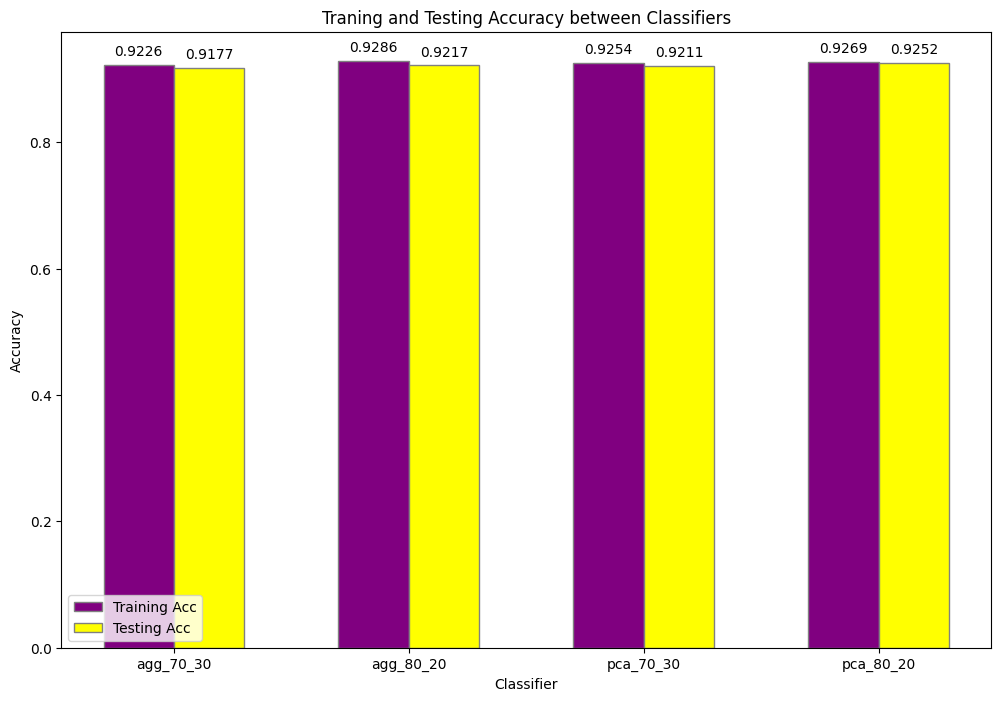

Highest Test Acc. Test set: pca_80_20
Highest Test Acc. value: 0.9252380952380952


In [36]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 

testing_label = ['agg_70_30', 'agg_80_20', 'pca_70_30', 'pca_80_20']

# Set position of bar on X axis 
br1 = np.arange(len(training_accuracy)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, training_accuracy, color ='purple', width = barWidth, 
        edgecolor ='grey', label ='Training Acc') 
plt.bar(br2, testing_accuracy, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Testing Acc') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('Accuracy') 
plt.xticks([r + 0.15 for r in range(len(training_accuracy))], 
        testing_label)
plt.title("Traning and Testing Accuracy between Classifiers")

# Add bar labels
for i in range(len(training_accuracy)):
    plt.text(br1[i], training_accuracy[i] + 0.01, 
             f'{training_accuracy[i]:.4f}', ha='center', va='bottom')
    plt.text(br2[i], testing_accuracy[i] + 0.01, 
             f'{testing_accuracy[i]:.4f}', ha='center', va='bottom')
plt.legend()
plt.show() 

print("Highest Test Acc. Test set:", testing_label[testing_accuracy.index(max(testing_accuracy))])
print("Highest Test Acc. value:", max(testing_accuracy))

We are going to select the model trained with the '80:20 training:testing split cir_ncir_pca' dataset with a 'hidden_layer_sizes = [10, 10, 10]' as it provides us with the (marginally) highest training and testing accuracy. This model will be saved to a pickle file for later usage.

In [37]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

HIDDEN_LAYER_SIZE = [30, 30, 30]

clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("MLP trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

save_to_pickle('nn_cir_ncir_pca_80_20', './pickled_models' , clf)

MLP trained with cir_ncir_pca_80_20:
-------------------------------
Hidden Layer Size:  [30, 30, 30]
Training Accuracy:  0.926875
Testing Accuracy:  0.9252380952380952




# <u> Appendum </u>

For the sake of analysis, we will also need to export the model trained with the `cir_ncir_agg_80_20` dataset

In [40]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

MAX_DEPTH = 8

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

HIDDEN_LAYER_SIZE = [ 60, 60, 60 ]

clf1 = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf1.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf1.predict(X_train_80_20)
Y_predTest = clf1.predict(X_test_80_20)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

save_to_pickle('nn_cir_ncir_agg_80_20', './pickled_models' , clf1)

Hidden Layer Size:  [60, 60, 60]
Training Accuracy:  0.9285714285714286
Testing Accuracy:  0.9216666666666666




<hr>

# <u> References </u>

[1] Google. (n.d.). Classification: Accuracy, recall, precision, and related metrics. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall (accessed Mar. 16, 2025) <br>
[2] Hyperskill. (n.d.). https://hyperskill.org/learn/step/29339 (accessed Mar. 16, 2025) <br>
